## 0. Setting up datasets 

In [1]:
# Importing libraries 

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Reading cars cvs file into DataFrame

car_df = pd.read_csv('cars.csv')

In [3]:
# Reading brand cvs file into DataFrame

brand_df = pd.read_csv('brand.csv')

In [4]:
# Checking the first five rows of car_df

car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [5]:
# Checking the first five rows of brand_df

brand_df.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


## 1. cars.csv와 brand.csv의 데이터 합치기

In [6]:
# It seems like the first word in 'title' in car_df is the manufacturer, whereas the second is the model name.
# Let's split the manfacturer name from 'title' in car_df

car_df['manufacturer'] = car_df['title'].str.split().apply(lambda x: x[0])

In [7]:
# Check if they have been separated properly

car_df.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,manufacturer
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL


In [8]:
# Change 'title' in brand_df into uppercase letter to match car_df inputs

brand_df['title'] = brand_df['title'].apply(lambda x: x.upper())

In [9]:
# Rename the column 'title' to 'manufacturer' in brand_df

brand_df = brand_df.rename({'title':'manufacturer'}, axis=1)

In [10]:
# Check the result

brand_df.head()

,manufacturer,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


In [11]:
# How many unique values are there in 'manufaturer' column in car_df?

car_df['manufacturer'].nunique()

48

In [12]:
# How many unique values are there in 'manufaturer' column in brand_df?

brand_df['manufacturer'].nunique()

48

In [13]:
# Let's have a look at the values in car_df in detail 

car_df['manufacturer'].unique()

array(['SKODA', 'VAUXHALL', 'HYUNDAI', 'MINI', 'FORD', 'VOLVO', 'PEUGEOT',
       'BMW', 'CITROEN', 'MERCEDES-BENZ', 'MAZDA', 'SAAB', 'VOLKSWAGEN',
       'HONDA', 'MG', 'TOYOTA', 'SEAT', 'NISSAN', 'ALFA', 'RENAULT',
       'KIA', 'PROTON', 'FIAT', 'AUDI', 'MITSUBISHI', 'LEXUS', 'LAND',
       'CHEVROLET', 'SUZUKI', 'DACIA', 'DAIHATSU', 'JEEP', 'JAGUAR',
       'CHRYSLER', 'ROVER', 'DS', 'DAEWOO', 'DODGE', 'PORSCHE', 'SUBARU',
       'INFINITI', 'ABARTH', 'SMART', 'MARCOS', 'MASERATI', 'SSANGYONG',
       'LAGONDA', 'ISUZU'], dtype=object)

In [14]:
# Do we have any values don't match up?

brand_df['manufacturer'].unique()

array(['SKODA', 'VAUXHALL', 'HYUNDAI', 'MINI', 'FORD', 'VOLVO', 'PEUGEOT',
       'BMW', 'CITROEN', 'MERCEDES-BENZ', 'MAZDA', 'SAAB', 'VOLKSWAGEN',
       'HONDA', 'MG', 'TOYOTA', 'SEAT', 'NISSAN', 'ALFA', 'RENAULT',
       'KIA', 'PROTON', 'FIAT', 'AUDI', 'MITSUBISHI', 'LEXUS', 'LAND',
       'CHEVROLET', 'SUZUKI', 'DACIA', 'DAIHATSU', 'JEEP', 'JAGUAR',
       'CHRYSLER', 'ROVER', 'DS', 'DAEWOO', 'DODGE', 'PORSCHE', 'SUBARU',
       'INFINITI', 'ABARTH', 'SMART', 'MARCOS', 'MASERATI', 'SSANGYONG',
       'LAGONDA', 'ISUZU'], dtype=object)

In [15]:
# Finanlly merge the tables

all_data = car_df.merge(brand_df, on='manufacturer', how='left')

In [16]:
# Check if the tables have been merged properly

all_data.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history,manufacturer,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [17]:
# Rename the columns for consistency

all_data = all_data.rename({
    'Price':'price', 
    'Mileage(miles)':'mileage', 
    'Registration_Year':'reg_yr', 
    'Previous Owners':'prev_owners',
    'Fuel type':'fuel_type',
    'Body type':'body_type', 
    'Engine':'engine', 
    'Gearbox':'gearbox', 
    'Doors':'doors', 
    'Seats':'seats', 
    'Emission Class':'emission_class', 
    'Service history':'service_history'}, 
    axis=1)

In [18]:
# Check the result

all_data.head()

,title,price,mileage,reg_yr,prev_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,manufacturer,country
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN,SKODA,Czech Republic
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full,VAUXHALL,United Kingdom
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN,HYUNDAI,South Korea
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full,MINI,United Kingdom
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN,VAUXHALL,United Kingdom


In [19]:
# Check if we have missed anything in joining the tables using 'manufacturer' column

all_data.isna().sum()

title                 0
price                 0
mileage               0
reg_yr                0
prev_owners        1411
fuel_type             0
body_type             0
engine               45
gearbox               0
doors                25
seats                35
emission_class       87
service_history    3147
manufacturer          0
country               0
dtype: int64

## 2. 카테고리형 변수를 숫자 형태로 변환하기
[힌트] Engine, Emission Class 변수에 주목하세요!

In [20]:
# Check the data types for each column

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3687 non-null   object 
 1   price            3687 non-null   int64  
 2   mileage          3687 non-null   int64  
 3   reg_yr           3687 non-null   int64  
 4   prev_owners      2276 non-null   float64
 5   fuel_type        3687 non-null   object 
 6   body_type        3687 non-null   object 
 7   engine           3642 non-null   object 
 8   gearbox          3687 non-null   object 
 9   doors            3662 non-null   float64
 10  seats            3652 non-null   float64
 11  emission_class   3600 non-null   object 
 12  service_history  540 non-null    object 
 13  manufacturer     3687 non-null   object 
 14  country          3687 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 460.9+ KB


In [21]:
# Let's see what the columns with object Dtype look like - starting with the 'fuel_type' column

all_data['fuel_type'].unique()

array(['Diesel', 'Petrol', 'Petrol Plug-in Hybrid', 'Petrol Hybrid',
       'Electric', 'Diesel Hybrid'], dtype=object)

In [22]:
# Then the 'body_type' column

all_data['body_type'].unique()

array(['Hatchback', 'Coupe', 'Estate', 'Saloon', 'Convertible', 'MPV',
       'SUV', 'Minibus', 'Combi Van', 'Pickup'], dtype=object)

In [23]:
# And the 'engine' column

all_data['engine'].unique()

# includes null values

array(['1.4L', '1.2L', '1.3L', '2.0L', '1.6L', '2.3L', '1.8L', '1.0L',
       '3.0L', '1.5L', '1.9L', '2.4L', '2.2L', '3.5L', '3.2L', '2.5L',
       '1.1L', '3.1L', '3.7L', '2.6L', '2.1L', '2.8L', '5.0L', '0.8L',
       '2.7L', '1.7L', '0.9L', '4.2L', nan, '4.4L', '4.3L', '3.3L',
       '5.5L', '4.8L', '6.3L'], dtype=object)

In [24]:
# And the 'gearbox' column

all_data['gearbox'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
# And the 'emission_class' column

all_data['emission_class'].unique()

# includes null values

array(['Euro 6', 'Euro 4', 'Euro 5', nan, 'Euro 3', 'Euro 2', 'Euro 1'],
      dtype=object)

In [26]:
# And the 'service_history' column

all_data['service_history'].unique()

# includes null values

array([nan, 'Full'], dtype=object)

So after examining the columns, I spotted a couple I could convert from categorical to numerical data 
* engine 
* emission_class

### engine

In [27]:
# Let's start with the 'engine' column - drop the 'L'

all_data['engine'] = all_data['engine'].str.replace('L', '')

In [28]:
# Then change the data type from object to numeric

all_data['engine'] = pd.to_numeric(all_data['engine'])

In [29]:
# Null values preserved?

all_data['engine'].unique()

array([1.4, 1.2, 1.3, 2. , 1.6, 2.3, 1.8, 1. , 3. , 1.5, 1.9, 2.4, 2.2,
       3.5, 3.2, 2.5, 1.1, 3.1, 3.7, 2.6, 2.1, 2.8, 5. , 0.8, 2.7, 1.7,
       0.9, 4.2, nan, 4.4, 4.3, 3.3, 5.5, 4.8, 6.3])

### emission_class

In [30]:
# For the 'emission_class' column, let's drop 'Euro ' from the strings

all_data['emission_class'] = all_data['emission_class'].str.replace('Euro ', '')

In [31]:
# Then change the data type from object to numerical data

all_data['emission_class'] = pd.to_numeric(all_data['emission_class'])

In [32]:
# Null values preserved?

all_data['emission_class'].unique()

array([ 6.,  4.,  5., nan,  3.,  2.,  1.])

In [33]:
# Final check

all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3687 non-null   object 
 1   price            3687 non-null   int64  
 2   mileage          3687 non-null   int64  
 3   reg_yr           3687 non-null   int64  
 4   prev_owners      2276 non-null   float64
 5   fuel_type        3687 non-null   object 
 6   body_type        3687 non-null   object 
 7   engine           3642 non-null   float64
 8   gearbox          3687 non-null   object 
 9   doors            3662 non-null   float64
 10  seats            3652 non-null   float64
 11  emission_class   3600 non-null   float64
 12  service_history  540 non-null    object 
 13  manufacturer     3687 non-null   object 
 14  country          3687 non-null   object 
dtypes: float64(5), int64(3), object(7)
memory usage: 460.9+ KB


## 3. 결측치 처리하기
[힌트] Service history 변수의 결측치는 'Unknown'으로 채우고, 결측치 변수가 일정 개수 이상 포함된 데이터는 제거합니다.

In [34]:
# How many missing values do we have in each column?

all_data.isna().sum()

title                 0
price                 0
mileage               0
reg_yr                0
prev_owners        1411
fuel_type             0
body_type             0
engine               45
gearbox               0
doors                25
seats                35
emission_class       87
service_history    3147
manufacturer          0
country               0
dtype: int64

In [35]:
# In percentage? 

all_data.isna().mean()

title              0.000000
price              0.000000
mileage            0.000000
reg_yr             0.000000
prev_owners        0.382696
fuel_type          0.000000
body_type          0.000000
engine             0.012205
gearbox            0.000000
doors              0.006781
seats              0.009493
emission_class     0.023596
service_history    0.853539
manufacturer       0.000000
country            0.000000
dtype: float64

### service_history 

In [36]:
# 'service_history' has the largest number of missing values - let's fill the null values with 'Unknown' as instructed

all_data['service_history'] = all_data['service_history'].fillna('Unknown')

### prev_owners

In [37]:
# Moving on to the column with the second most missing values

all_data['prev_owners'].value_counts()

2.0    594
1.0    523
3.0    475
4.0    360
5.0    208
6.0     60
7.0     39
8.0     12
9.0      5
Name: prev_owners, dtype: int64

<AxesSubplot:xlabel='prev_owners', ylabel='Count'>

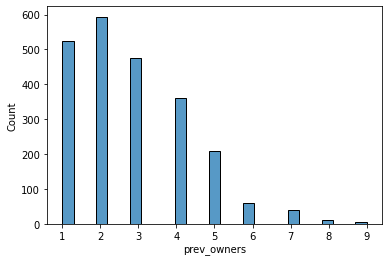

In [38]:
# See it in a histplot graph

sns.histplot(all_data['prev_owners'])

In [39]:
# Does replacing the missing values with the median make sense?

all_data['prev_owners'].median()

3.0

In [40]:
# Given the long tail, it seems alright - let's do it

all_data['prev_owners'] = all_data['prev_owners'].fillna(all_data['prev_owners'].median())

### emission_class

In [41]:
# The 'emission_class' column has third most missing values

all_data['emission_class'].value_counts()

5.0    1257
6.0    1109
4.0    1068
3.0     137
2.0      25
1.0       4
Name: emission_class, dtype: int64

In [42]:
# Is replacing the missing values with the median a sound way to go? 

all_data['emission_class'].median()

5.0

In [43]:
# How does it compare to the mode?

all_data['emission_class'].mode()

0    5.0
dtype: float64

In [44]:
# Looks good - replace

all_data['emission_class'] = all_data['emission_class'].fillna(all_data['emission_class'].median())

### engine

In [45]:
# Next, 'engine'

all_data['engine'].value_counts()

1.6    736
2.0    553
1.2    521
1.4    421
1.0    326
1.5    294
1.3    170
1.8    158
3.0     79
2.2     75
2.1     63
1.1     39
1.7     35
2.5     33
1.9     31
2.4     28
0.9     15
2.7     11
3.5     10
3.2      7
3.7      5
4.4      5
2.3      4
2.6      4
4.2      4
5.0      3
2.8      3
0.8      2
4.3      2
5.5      1
4.8      1
3.1      1
3.3      1
6.3      1
Name: engine, dtype: int64

<AxesSubplot:xlabel='engine', ylabel='Count'>

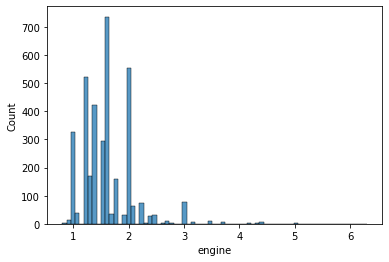

In [46]:
# Tricky - let's look at the histplot

sns.histplot(all_data['engine'])

In [47]:
# What's the median?

all_data['engine'].median()

1.6

In [48]:
# And the mode? 

all_data['engine'].mode()

0    1.6
dtype: float64

In [49]:
# 1.6  is the mode and the median - legit 

all_data['engine'] = all_data['engine'].fillna(all_data['engine'].median())

### the rest 

Let's get rid of rows for columns with missing values for which the count < 50 and in percetage < 1%

In [50]:
# Drop the missing values in 'doors' and 'seats' columns

all_data.dropna(subset = ['doors', 'seats'], inplace=True)

In [51]:
# Make sure there are no missing values left anymore

all_data.isna().sum()

title              0
price              0
mileage            0
reg_yr             0
prev_owners        0
fuel_type          0
body_type          0
engine             0
gearbox            0
doors              0
seats              0
emission_class     0
service_history    0
manufacturer       0
country            0
dtype: int64

In [52]:
# Index the table again

all_data.reset_index(drop=True, inplace=True)

## 4. Scaler 활용해보기

In [53]:
# Summary of the DataFrame 

all_data.describe()

,price,mileage,reg_yr,prev_owners,engine,doors,seats,emission_class
count,3642.000000,3.642000e+03,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000,3642.000000
mean,5791.688907,8.133136e+04,2011.959912,2.878913,1.603405,4.325096,4.900329,4.916255
std,4492.503750,3.940404e+04,4.760457,1.218010,0.482975,0.984232,0.574764,0.895755
min,400.000000,1.000000e+00,1987.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,8.000000e+04,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7998.000000,1.030000e+05,2016.000000,3.000000,1.800000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


The 'price' and 'mileage' columns seem like they will benefit from scaling.
On the other hand, the min/max values for 'mileage' look dubious - possible outliers. 

### Outliers 

Let's deal with the outliers in the 'mileage' column first

In [54]:
# What are the rows with 5 lowest mileage values?

all_data.sort_values(by='mileage').head()

,title,price,mileage,reg_yr,prev_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,manufacturer,country
3176,MG MG ZS,18515,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,MG,United Kingdom
3058,MG MG ZS,18365,1,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,MG,United Kingdom
1982,MG ZT,15500,6,2004,4.0,Petrol,Saloon,1.8,Manual,4.0,5.0,3.0,Unknown,MG,United Kingdom
3060,SEAT ATECA,25995,222,2023,3.0,Petrol,SUV,1.5,Manual,5.0,5.0,6.0,Unknown,SEAT,Spain
2720,MG MG HS,21495,1048,2023,1.0,Petrol,SUV,1.5,Automatic,5.0,5.0,6.0,Unknown,MG,United Kingdom


In [55]:
# Let's drop the three rows with > 10 mileage value

all_data.drop([3176, 3058, 1982], axis=0, inplace=True)

In [56]:
# What are the rows with 5 highest mileage values?

all_data.sort_values(by='mileage', ascending=False).head()

,title,price,mileage,reg_yr,prev_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,manufacturer,country
1021,VOLKSWAGEN BEETLE,2495,1110100,2003,4.0,Petrol,Hatchback,2.0,Automatic,3.0,4.0,4.0,Unknown,VOLKSWAGEN,Germany
1903,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,VOLVO,Sweden
2015,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,VOLVO,Sweden
1237,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,VOLVO,Sweden
1656,VOLVO V70,795,274100,2004,6.0,Petrol,Estate,2.4,Automatic,5.0,5.0,3.0,Unknown,VOLVO,Sweden


In [57]:
# Let's drop the top row for sure

all_data.drop(1021, axis=0, inplace=True)

In [58]:
# Verify the changes

all_data.describe()

,price,mileage,reg_yr,prev_owners,engine,doors,seats,emission_class
count,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000
mean,5782.973062,81115.641286,2011.958494,2.878230,1.603299,4.325179,4.900495,4.916438
std,4481.945064,35466.662377,4.751879,1.218393,0.483179,0.984386,0.574879,0.895195
min,400.000000,222.000000,1987.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,56984.000000,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,4000.000000,80000.000000,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7995.000000,103000.000000,2016.000000,3.000000,1.800000,5.000000,5.000000,6.000000
max,33900.000000,274100.000000,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


### Scaling - price

<AxesSubplot:xlabel='price', ylabel='Count'>

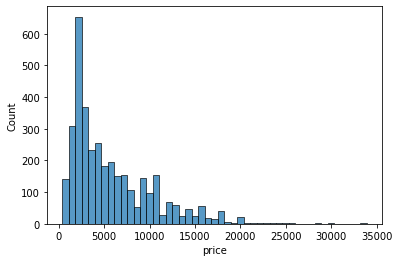

In [59]:
# Let's check the distribution 

sns.histplot(all_data['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

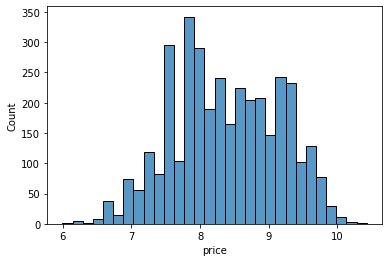

In [60]:
# Log transformation so the data will follow normal distribution

sns.histplot(np.log1p(all_data['price']))

# log1p <--> expm1

In [61]:
# Import the scalers from scikit-learn

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [62]:
# Define the scalers

ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [63]:
# Reshape the 'mileage' column to be 2D

price_reshaped = np.log1p(all_data['price']).values.reshape(-1, 1)

In [64]:
# Create a copy to store scaled results

all_data_scaled = all_data.copy()

In [65]:
# Fit and transform, then replace the old 'price' column

all_data_scaled['price'] = ss.fit_transform(price_reshaped)

### Scaling - mileage

<AxesSubplot:xlabel='mileage', ylabel='Count'>

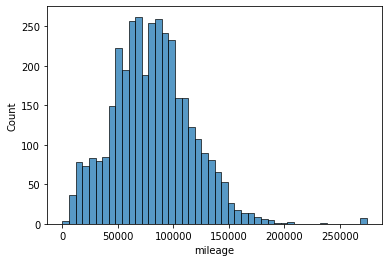

In [66]:
# Check the distribution 

sns.histplot(all_data['mileage'])

# Reasonably bell-shaped 

In [67]:
# Reshape the 'mileage' column to be 2D

mileage_reshaped = np.log1p(all_data['mileage']).values.reshape(-1, 1)

In [68]:
# Fit and transform, then replace the old 'mileage' column

all_data_scaled['mileage'] = ss.fit_transform(mileage_reshaped)

In [69]:
# Pull the summary of all_data_scaled

all_data_scaled.describe()

,price,mileage,reg_yr,prev_owners,engine,doors,seats,emission_class
count,3.638000e+03,3.638000e+03,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000
mean,-1.234368e-15,-1.218743e-15,2011.958494,2.878230,1.603299,4.325179,4.900495,4.916438
std,1.000137e+00,1.000137e+00,4.751879,1.218393,0.483179,0.984386,0.574879,0.895195
min,-3.086715e+00,-1.050649e+01,1987.000000,1.000000,0.800000,2.000000,2.000000,1.000000
25%,-7.203204e-01,-4.225426e-01,2008.000000,2.000000,1.300000,3.000000,5.000000,4.000000
50%,-1.063847e-01,1.945887e-01,2012.000000,3.000000,1.600000,5.000000,5.000000,5.000000
75%,7.906886e-01,6.542743e-01,2016.000000,3.000000,1.800000,5.000000,5.000000,6.000000
max,2.662195e+00,2.434732e+00,2023.000000,9.000000,6.300000,5.000000,7.000000,6.000000


### Scaling: categorical 

In [70]:
# How many unique values do we have per column? 

all_data_scaled[['fuel_type','body_type','gearbox','service_history', 'manufacturer', 'country']].nunique()

fuel_type           6
body_type           9
gearbox             2
service_history     2
manufacturer       46
country            12
dtype: int64

#### manufacturer

In [71]:
# Which manufacturers have the least tallies?

all_data_scaled['manufacturer'].value_counts().tail(15)

SAAB         6
DS           6
MG           6
CHRYSLER     5
SMART        4
MASERATI     3
ROVER        3
PORSCHE      3
ABARTH       3
PROTON       2
SSANGYONG    2
DAIHATSU     2
DODGE        1
DAEWOO       1
ISUZU        1
Name: manufacturer, dtype: int64

In [72]:
# Let's replace all manufacturers with count < 3 to 'OTHER'

all_data_scaled['manufacturer'] = all_data_scaled['manufacturer'].replace({'DAIHATSU':'OTHER', 
                                                             'PROTON':'OTHER', 
                                                             'SSANGYONG':'OTHER', 
                                                             'DAEWOO':'OTHER', 
                                                             'DODGE':'OTHER', 
                                                             'ISUZU': 'OTHER'})

In [73]:
# Examine the result

all_data_scaled['manufacturer'].nunique()

41

#### title

In [74]:
# Eliminate the 'title' column as well

all_data_scaled.drop('title', axis=1, inplace=True)

#### the rest

In [75]:
# Import label encoder for the categorical data

from sklearn.preprocessing import LabelEncoder

In [76]:
# Define the label encoder

le = LabelEncoder()

In [77]:
# Select the columns to encode

columns_to_encode = ['fuel_type', 'body_type', 'gearbox', 'service_history', 'manufacturer', 'country']

In [78]:
# Loop through the columns and apply LabelEncoder

for column in columns_to_encode:
    all_data_scaled[column] = le.fit_transform(all_data_scaled[column])

In [79]:
# Assess the outcome

all_data_scaled.head()

,price,mileage,reg_yr,prev_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,manufacturer,country
0,0.599878,-0.043410,2016,3.0,0,4,1.4,1,5.0,5.0,6.0,1,33,0
1,-1.380936,0.380018,2008,4.0,3,4,1.2,1,3.0,5.0,4.0,0,38,10
2,-1.969255,1.173171,2011,3.0,3,4,1.4,1,5.0,5.0,5.0,1,12,7
3,-0.770698,0.540045,2010,5.0,3,4,1.4,1,3.0,4.0,4.0,0,23,10
4,-1.901504,0.304870,2013,3.0,0,4,1.3,1,5.0,5.0,5.0,1,38,10


## 5. 기존 데이터의 정보 70% 이상을 가지는 수준에서 최소한의 주성분 추출 (PCA)

In [81]:
# Ensure all columns are in float/int data type

all_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3638 entries, 0 to 3641
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            3638 non-null   float64
 1   mileage          3638 non-null   float64
 2   reg_yr           3638 non-null   int64  
 3   prev_owners      3638 non-null   float64
 4   fuel_type        3638 non-null   int64  
 5   body_type        3638 non-null   int64  
 6   engine           3638 non-null   float64
 7   gearbox          3638 non-null   int64  
 8   doors            3638 non-null   float64
 9   seats            3638 non-null   float64
 10  emission_class   3638 non-null   float64
 11  service_history  3638 non-null   int64  
 12  manufacturer     3638 non-null   int64  
 13  country          3638 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 426.3 KB


In [82]:
# Exclude the dependent variable 'price'

all_data_excluded = all_data_scaled.drop(columns=['price'])

In [83]:
# Import the PCA package

from sklearn.decomposition import PCA

In [84]:
# Define PCA

pca = PCA()

In [85]:
# Run PCA on all_data

pca_all_data = pca.fit(all_data_excluded)

In [86]:
# Calculate the Explained Variance Ratio

explained_variance_ratio = pca_all_data.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

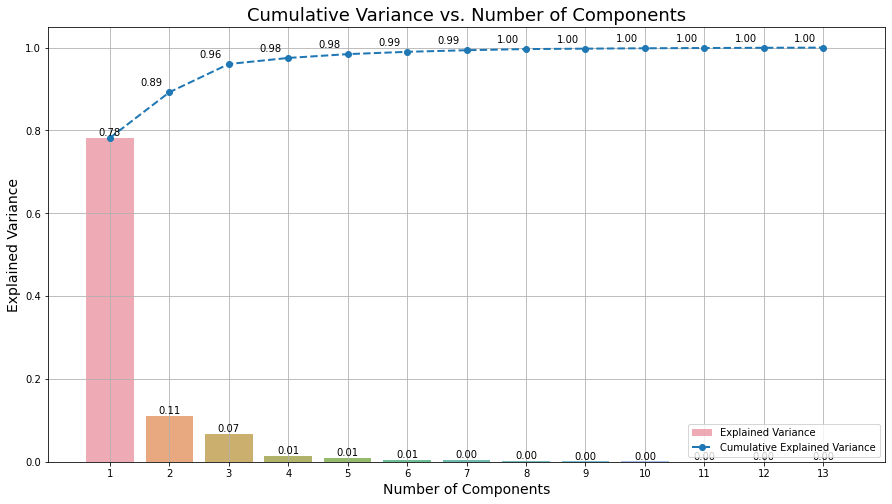

In [87]:
# Visualise the above

# Import plt
import matplotlib.pyplot as plt

# Create a new figure using plt.figure()
plt.figure(figsize=(15, 8))

# Bar plot for explained variance ratio
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)), y=explained_variance_ratio, alpha=0.8)

# Line plot for cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot],
           labels=['Explained Variance', 'Cumulative Explained Variance'])  

# Display variance values for each component
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()

The first principal component (PC1) explains 78% of the variance, and the second component 11%. 
Here, we hold on to principal components that explain at least 70% of the variance cumulatively. With the first principal component, the cumulative proportion of the variance explained already surpasses 70%. Therefore, we could consider to keep the **first principal component**. 
However, we can observe an elbow at the third principle component, cumulatively explaining 96% of the variance.

In [88]:
# Choose number of components

pca = PCA(1)

In [89]:
# The transformed DataFrame

pd.DataFrame(pca.fit_transform(all_data_excluded), columns = ['PC1'])

,PC1
0,-10.338950
1,-15.557900
2,10.469660
3,-0.579307
4,-15.589236
...,...
3633,-6.300752
3634,20.658461
3635,19.688572
3636,11.630604


In [90]:
# Find the explained_variance_ratio_

pca.explained_variance_ratio_

array([0.78206128])

## Questions. 

### 1. 국가별 총 브랜드 개수는?

In [91]:
all_data.groupby('country')['manufacturer'].nunique()

country
Czech Republic     1
France             4
Germany            6
Italy              4
Japan             11
Malaysia           1
Romania            1
South Korea        4
Spain              1
Sweden             2
United Kingdom     6
United States      5
Name: manufacturer, dtype: int64

### 2. 상관관계가 높은 변수들이 있는지 확인해보세요.

In [94]:
# Can discover multicollinearity problem by monitoring correlations

all_data_scaled.corr()

,price,mileage,reg_yr,prev_owners,fuel_type,body_type,engine,gearbox,doors,seats,emission_class,service_history,manufacturer,country
price,1.000000,-0.572344,0.806897,-0.411079,-0.060160,0.160545,-0.025373,-0.175283,0.110838,-0.039877,0.758504,-0.164105,-0.081881,-0.112236
mileage,-0.572344,1.000000,-0.514153,0.304088,-0.247798,0.011553,0.345920,-0.091686,-0.072403,0.099568,-0.419125,0.099974,-0.124239,-0.017307
reg_yr,0.806897,-0.514153,1.000000,-0.413801,-0.061916,0.061133,-0.296531,0.082169,0.214610,0.026770,0.909193,-0.133723,0.023104,-0.006360
prev_owners,-0.411079,0.304088,-0.413801,1.000000,-0.029972,-0.060482,0.144767,-0.013364,-0.121259,-0.026725,-0.376624,0.199086,-0.026071,0.012741
fuel_type,-0.060160,-0.247798,-0.061916,-0.029972,1.000000,-0.174248,-0.363673,0.077772,-0.160139,-0.205543,-0.106299,-0.005267,0.107117,0.137361
body_type,0.160545,0.011553,0.061133,-0.060482,-0.174248,1.000000,0.279442,-0.164272,0.286690,0.359717,0.033547,-0.024362,-0.098715,-0.073522
engine,-0.025373,0.345920,-0.296531,0.144767,-0.363673,0.279442,1.000000,-0.469019,-0.061219,0.074035,-0.261767,-0.011770,-0.245818,-0.078182
gearbox,-0.175283,-0.091686,0.082169,-0.013364,0.077772,-0.164272,-0.469019,1.000000,0.062625,-0.005572,0.086187,0.008103,0.177906,0.168082
doors,0.110838,-0.072403,0.214610,-0.121259,-0.160139,0.286690,-0.061219,0.062625,1.000000,0.496900,0.176554,-0.042315,0.101550,0.046218
seats,-0.039877,0.099568,0.026770,-0.026725,-0.205543,0.359717,0.074035,-0.005572,0.496900,1.000000,0.022306,-0.028785,0.090207,0.056058


High correlation between 'reg_yr' and 'emission_class' observed (0.909193)

## Comments

* 배운 내용을 논리의 흐름에 따라 적었는데, 그 과정에서 Scaling 관련 개념이 많이 약하다는 것을 알게 되었습니다. 
* 'reg_yr'와 'emission_class'의 상관관계가 높아 처음부터 둘 중 하나만 사용해서 결과를 돌려봤는데 PCA 결과에는 차이가 거의 없었습니다. 
* PC1에서 분산의 70% 이상이 설명되었지만, 엘보우 포인트는 PC3에서 관찰되었습니다. 
* 원핫인코딩을 사용하기엔 카테고리형 데이터의 유니크한 값이 많아, 라벨 인코딩을 사용했습니다. 원핫인코딩도 사용해봤는데 역시 PCA 결과에 차이가 없었습니다. 
* 상황에 따라 어떤 방법을 써서 데이터를 처리해야 하는지가 빠르게 판단된는 경지에 얼른 다다르고 싶습니다. 